# Tanzania Tourism Prediction by Pycon Tanzania Community


This is a simple starter notebook to get started with the competition - Zindi

This notebook covers:
- Loading the data
- Simple EDA 
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# for loading data
import pandas as pd

import numpy as np

#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# model fitting
from sklearn.linear_model import LinearRegression

# model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

### 1. Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (4809, 23)
test data shape : (1601, 22)


The above output shows the number of rows and columns for train and test dataset. We have 23 variables in the train dataset, 22 independent variables and 1 dependent variable. In the test dataset, we have 22 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [4]:
# inspect train data
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


Take a look at the variable definations provided. 
- total_cost is the target variable. 

In [5]:
variables

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
# Check for missing values. travel_with & most_impressing has missing values
train.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [8]:
obj_cols = train.select_dtypes(['object']).columns.drop('ID')

Let us check the distribution of the categorical variables.

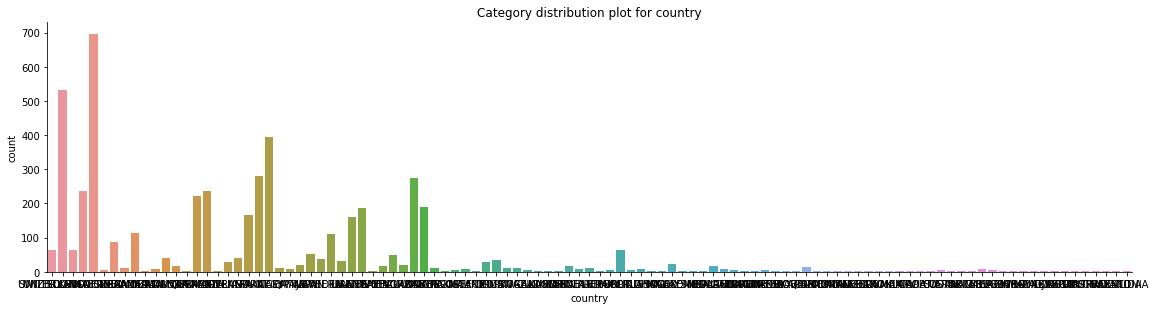

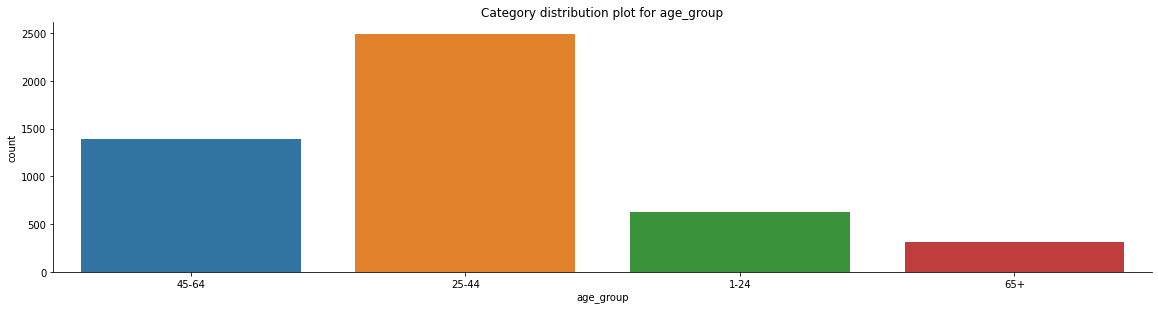

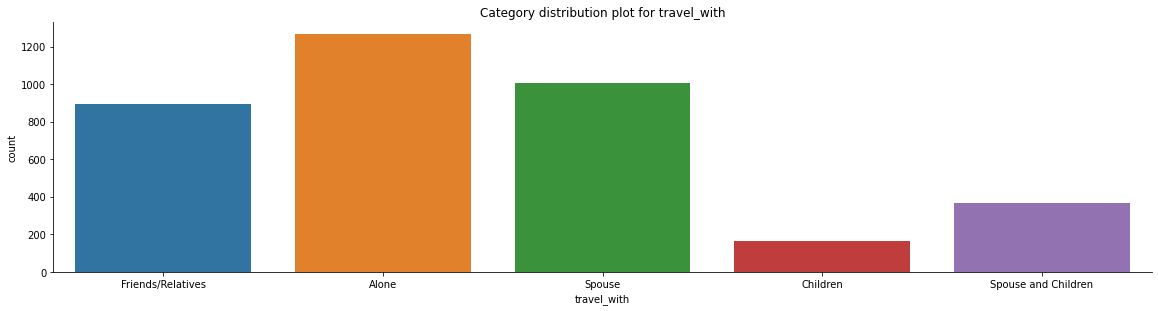

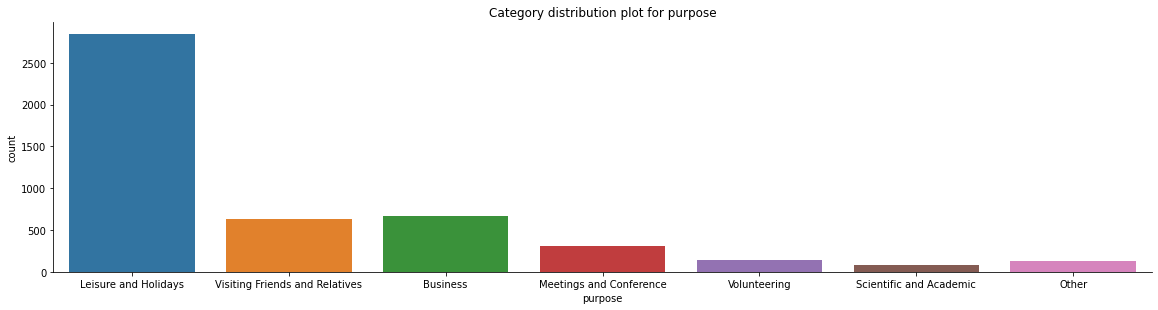

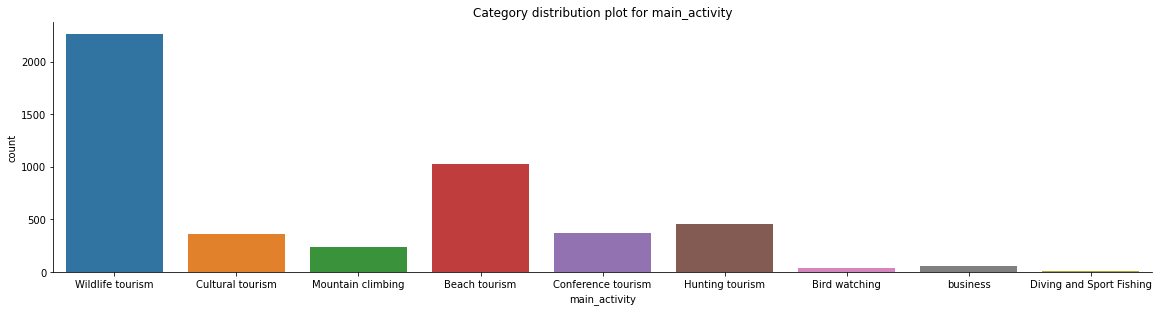

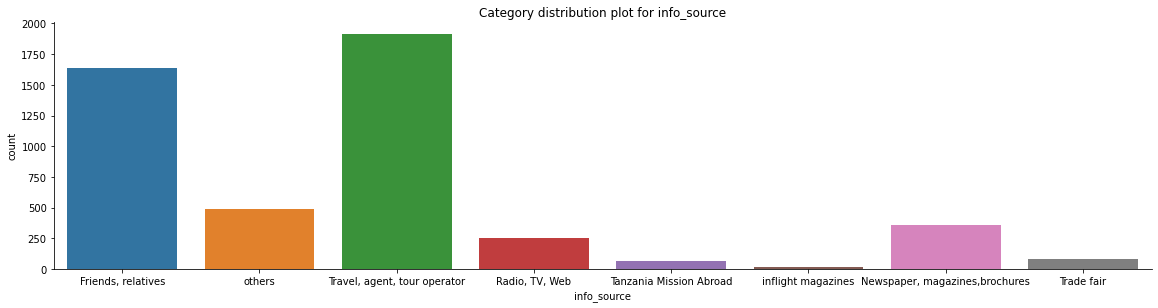

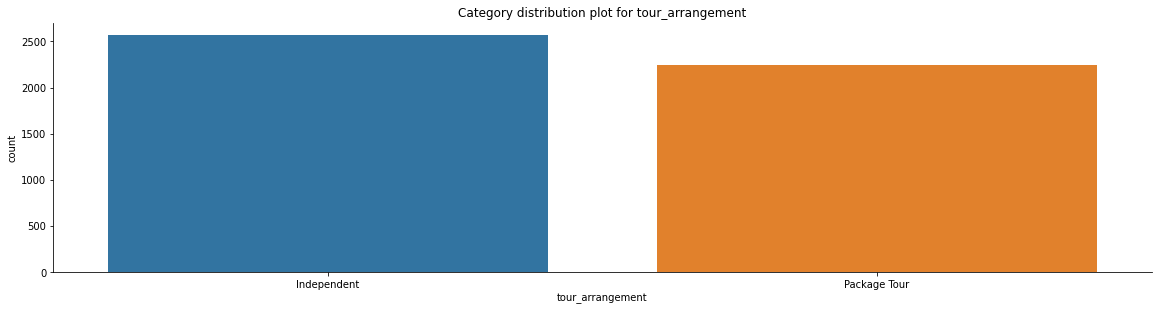

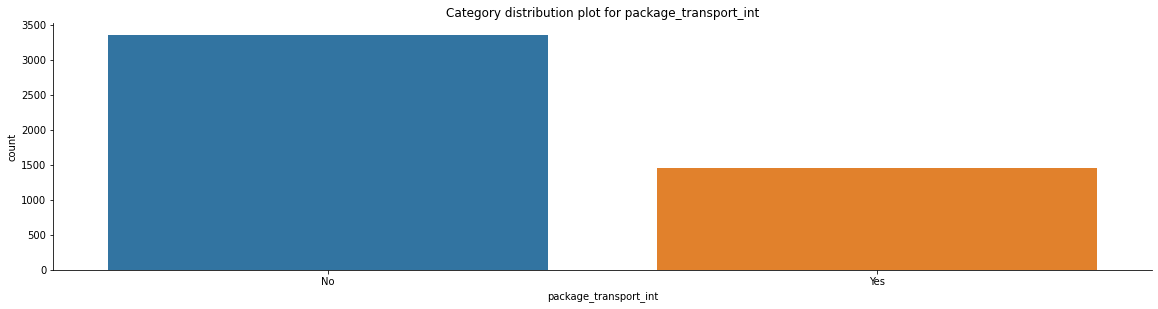

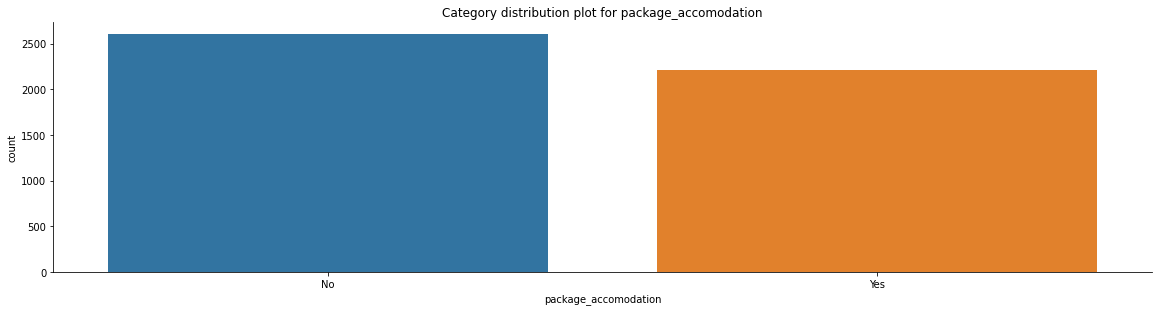

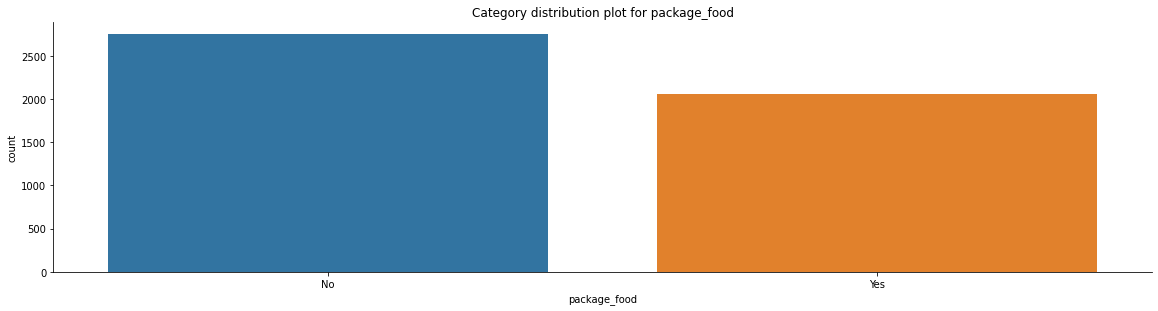

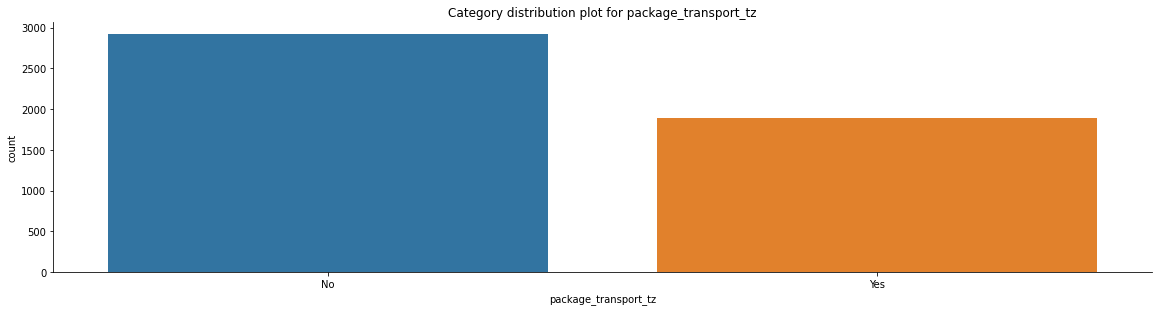

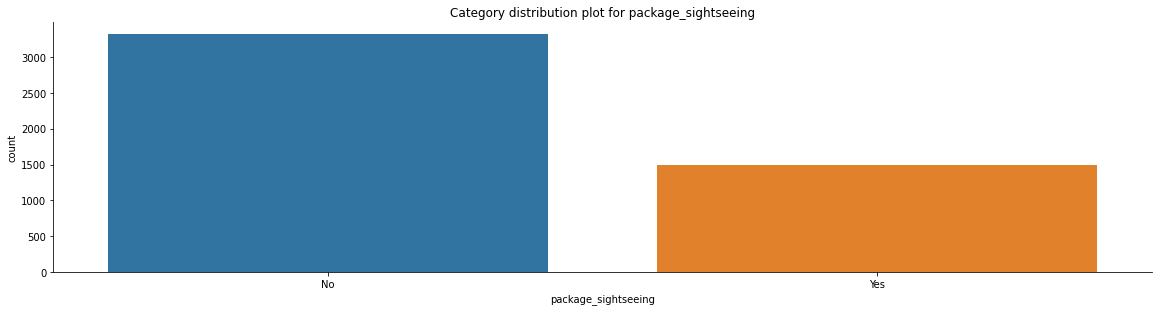

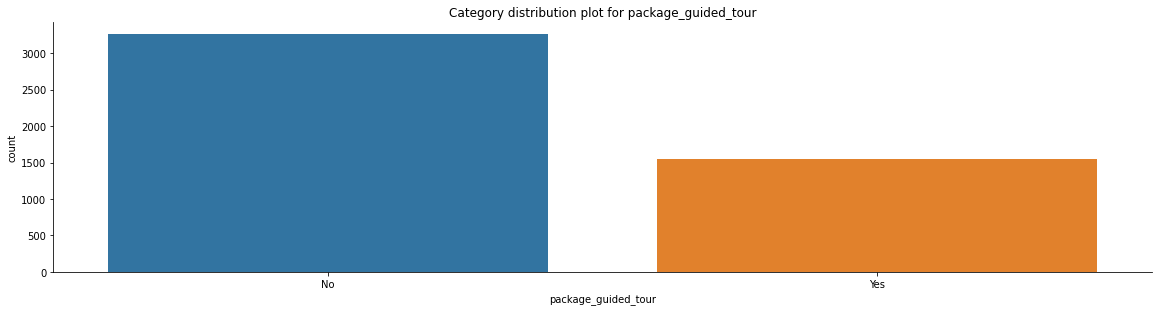

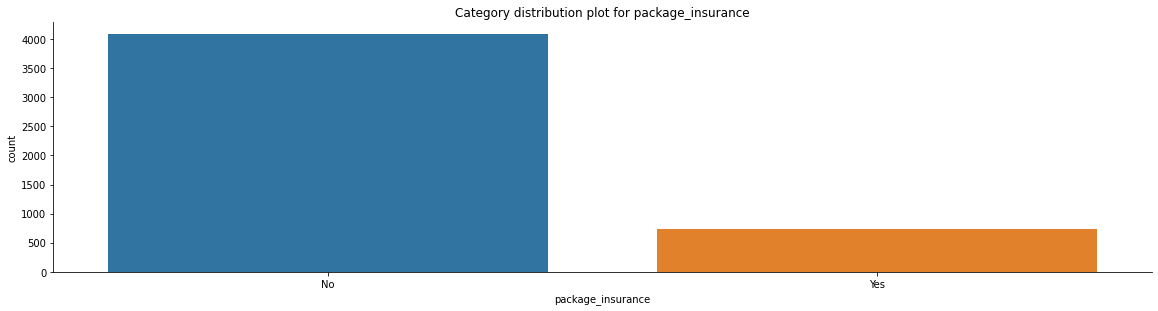

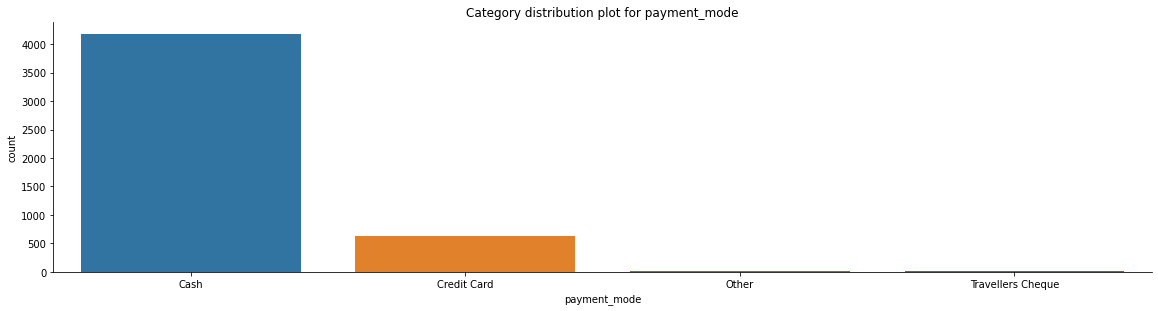

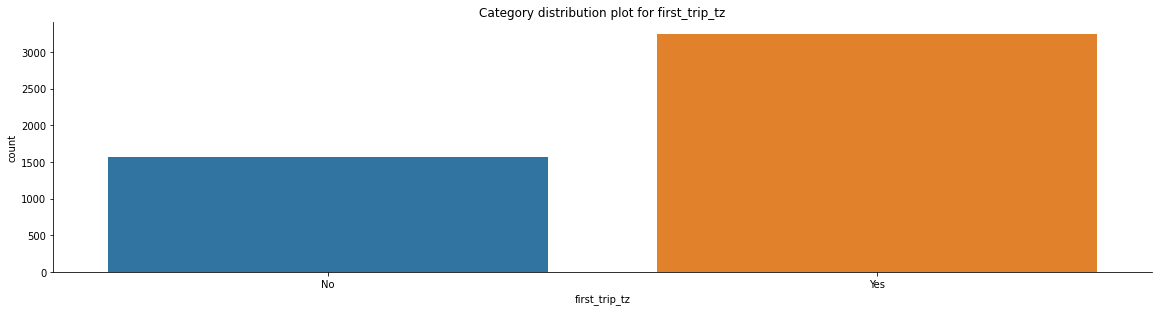

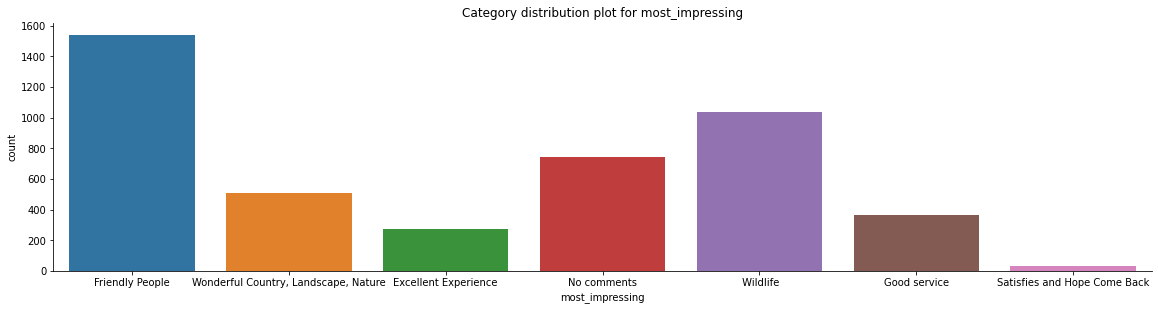

In [9]:
for col in list(obj_cols):
    # Explore Target distribution 
    sns.catplot(x=col, kind="count", data=train,height=4, aspect=4)
    plt.title("Category distribution plot for " + col)

### 3. Preprocessing

In [10]:
#Separate training features from target
X_train = train.drop(['total_cost'], axis=1)
y_train = train['total_cost']

print(y_train)

0         674602.5
1        3214906.5
2        3315000.0
3        7790250.0
4        1657500.0
           ...    
4804     3315000.0
4805    10690875.0
4806     2246636.7
4807     1160250.0
4808    13260000.0
Name: total_cost, Length: 4809, dtype: float64


Create lists of the categorical variables. 

In [11]:
usefull_categories = ["travel_with","purpose","age_group","main_activity","info_source","tour_arrangement","payment_mode","most_impressing"]
binary_categories = ["country",'package_accomodation',"package_food","package_transport_int","package_transport_tz","package_sightseeing","package_guided_tour","package_insurance","first_trip_tz"]

In [12]:
# Re-used from other Zindi starter notebooks.
# function to preprocess our data from train models

def preprocessing_data(data):
    
    # Label Encoder conversion
    le = LabelEncoder()
    for col in binary_categories+usefull_categories:
        data[col] = le.fit_transform(data[col])
        
    # fill in missing values in total_female and total_male
    data.fillna(data.mean(), inplace = True)

    # drop uniquid column
    data = data.drop(["ID"], axis=1)
    corr_data = data.copy()

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data, corr_data

In [13]:
# preprocess the train data 
processed_train, corr_train = preprocessing_data(X_train)
processed_test, corr_test = preprocessing_data(test)

In [14]:
corr_train.isna().sum()

country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [15]:
processed_train.shape

(4809, 21)

In [16]:
def plot_correlation(data, str):
    plt.title(str)
    fig, ax = plt.subplots(figsize=(20,20))  
    sns.heatmap(corr_test.corr(), ax = ax,annot=True, linewidths=.5)
    plt.show()

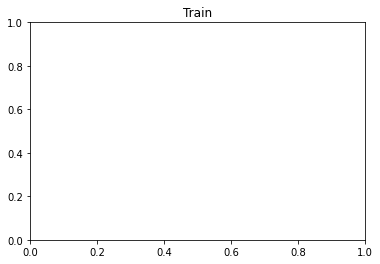

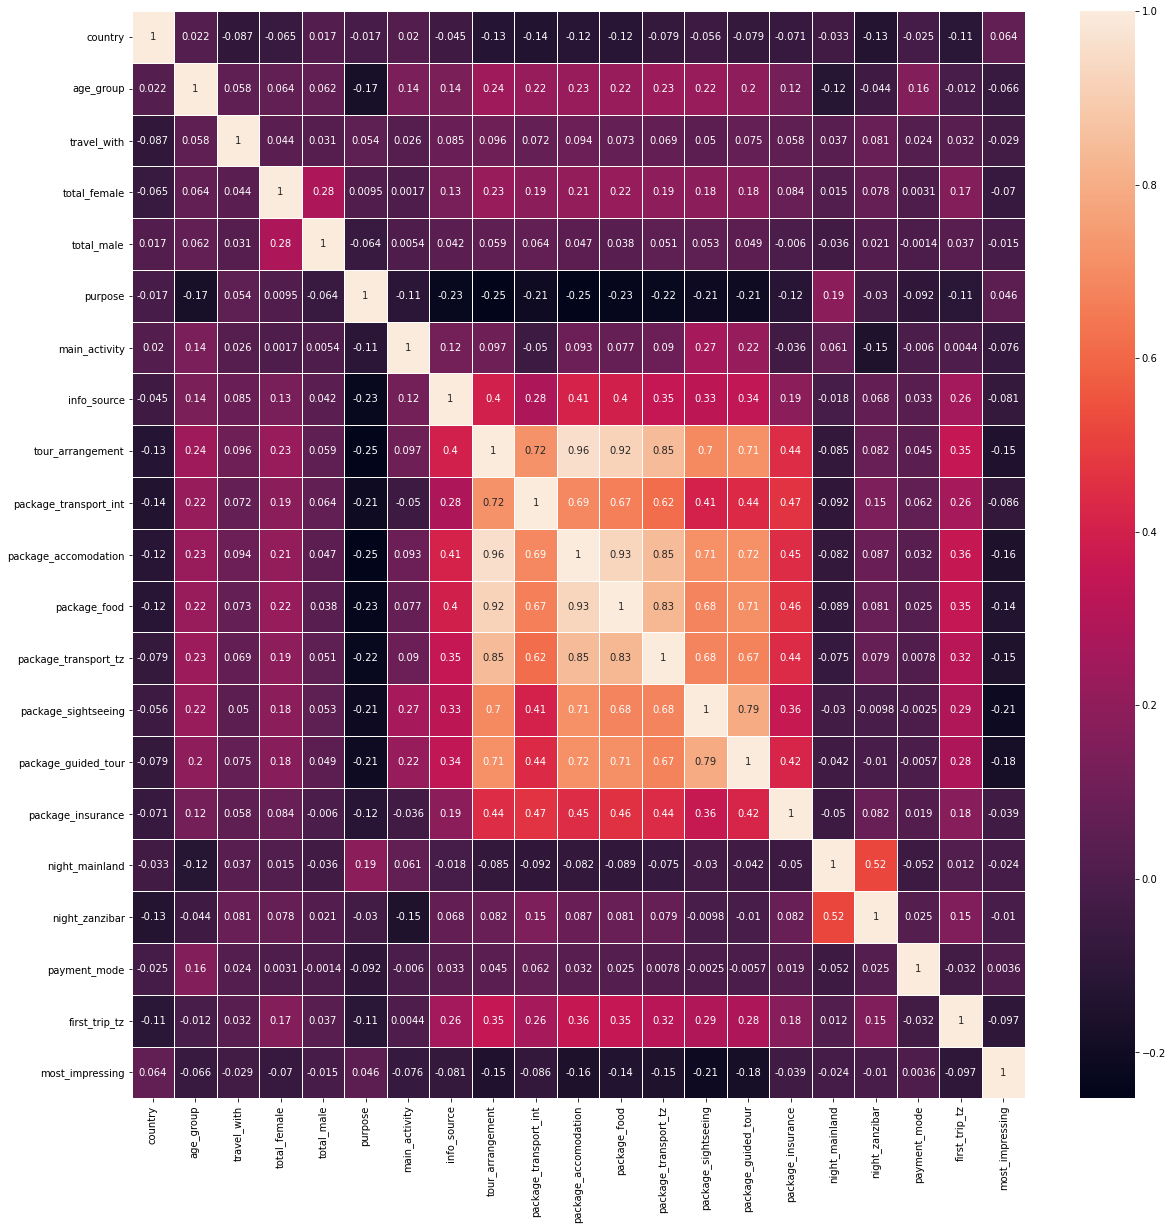

In [17]:
# display a correlation heatmap
plot_correlation(corr_train, "Train")

From the heatmap we can see visible co-linearlity that might affect how the model performs. Feature engineering should be performed to deal with this.

### 4. Modeling

We shall use a simple linear model to train and predict the target variable; total_cost

In [18]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(processed_train, y_train,
                                                  test_size = 0.1, random_state=42)

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(X_test)

In [22]:
lm?

Type:        LinearRegression
String form: LinearRegression()
File:        /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before 

In [23]:
# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [  775791.56711312  6779251.15531017   905212.44778915 63440541.53542574
 32186637.28751919 -1097965.11884894   807407.36161626   318663.37300145
  1252006.8914467   4205225.41055947  1163294.72035709  1175450.87539043
  1480672.94078652  2430021.91733183   422409.57700849    72793.41269332
 14469315.6518818  15565601.20065792  6684488.98285094  1020933.51115878
  -699056.51266031]
Mean squared error: 99050439619068.17
Coefficient of determination: 0.32
Mean absolute error: 5638298.69


### 5. Model improvement
- Combining both train & test data to have a huge dataset for training.
- Try other encoding techniques
- Try other data standardization techniques
- Try out feature engineering 
- Try removing / combining features that cause Multicollinearity
- Use crossvalidation instead of train_test_split.
- Tune hyperparameters for the model used.
- Test out other complex modeling techniques i.e bagging, boosting e.t.c